# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

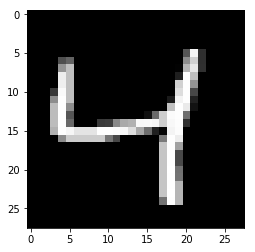

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [15]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, shape =(None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="decoded")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [16]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [17]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6898
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6801
Epoch: 1/20... Training loss: 0.6732
Epoch: 1/20... Training loss: 0.6658
Epoch: 1/20... Training loss: 0.6568
Epoch: 1/20... Training loss: 0.6468
Epoch: 1/20... Training loss: 0.6350
Epoch: 1/20... Training loss: 0.6200
Epoch: 1/20... Training loss: 0.6055
Epoch: 1/20... Training loss: 0.5910
Epoch: 1/20... Training loss: 0.5771
Epoch: 1/20... Training loss: 0.5584
Epoch: 1/20... Training loss: 0.5410
Epoch: 1/20... Training loss: 0.5227
Epoch: 1/20... Training loss: 0.5035
Epoch: 1/20... Training loss: 0.4888
Epoch: 1/20... Training loss: 0.4706
Epoch: 1/20... Training loss: 0.4526
Epoch: 1/20... Training loss: 0.4376
Epoch: 1/20... Training loss: 0.4249
Epoch: 1/20... Training loss: 0.4031
Epoch: 1/20... Training loss: 0.3963
Epoch: 1/20... Training loss: 0.3826
Epoch: 1/20... Training loss: 0.3651
Epoch: 1/20... Training loss: 0.3638
E

Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1988
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1941
E

Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1561
E

Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1348
E

Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1316
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1182
E

Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1120
E

Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1034
E

Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1077
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1034
E

Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1007
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0975
E

Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0889
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0875
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0888
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0988
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0880
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0889
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0867
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0880
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0885
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

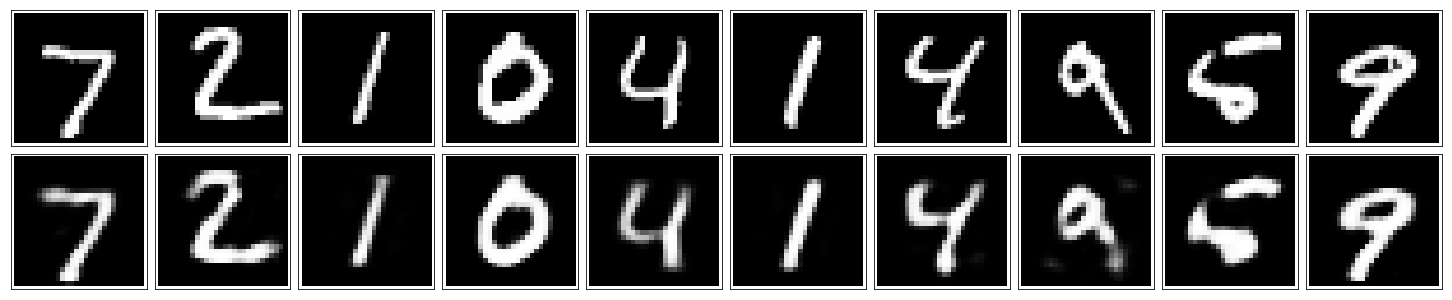

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [19]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.